In [66]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.animation as animation
from tqdm import tqdm

**7. Estabilidad de la ecuación de onda**

Primero discretizamos el espacio de la ecuación de onda en una dimensión utilizando la definiciones de derivada. Para la derivada central se utilizará una derivada progresiva mientras que se para las espaciales se utilizará central. 

$$\frac{\partial u}{\partial t}=c\frac{\partial u}{\partial x} \quad \rightarrow \quad \frac{u_{i}^{l+1}-u_{i}^{l}}{\Delta t}+c\frac{u_{i+1}^{l}-u_{i-1}^{l}}{2\Delta x}=0 $$

Donde c será la velocidad lineal. Luego, despejando para $u_{i}^{l+1}$ obtenemos que:

$$\frac{u_{i}^{l+1}}{\Delta t}=\frac{u_{i}^{l}}{\Delta t}-c\frac{u_{i+1}^{l}-u_{i-1}^{l}}{2\Delta x} \quad \rightarrow \quad u_{i}^{l+1}=\frac{u_{i+1}^{l}+u_{i-1}^{l}}{2}-\left(\frac{c\Delta t}{\Delta x}\right)\frac{u_{i+1}^{l}-u_{i-1}^{l}}{2} $$

Ahora, para analizar su estabilidad se tomará el error de la forma:

$$\epsilon_{i}^{l}= e^{l\gamma\Delta t}e^{ji\beta \Delta x} \quad \quad u_N=u_E+u_\epsilon \quad \text{donde} \quad N=E+\epsilon$$

Donde $\beta$ el número de onda correspondiente al error de los harmónicos de Fourier $(2\pi/N \leq \beta \Delta x\leq \pi)$. Así,

$$\epsilon_{i}^{l+1}=\frac{\epsilon_{i+1}^{l}+\epsilon_{i-1}^{l}}{2}-\left(\frac{c\Delta t}{\Delta x}\right)\frac{\epsilon_{i+1}^{l}-\epsilon_{i-1}^{l}}{2} $$
$$ e^{(l+1)\gamma\Delta t}e^{ji\beta \Delta x}=\frac{ e^{l\gamma\Delta t}e^{j(i+1)\beta \Delta x}+ e^{l\gamma\Delta t}e^{j(i-1)\beta \Delta x}}{2}-\left(\frac{c\Delta t}{\Delta x}\right)\frac{e^{l\gamma\Delta t}e^{j(i+1)\beta \Delta x}- e^{l\gamma\Delta t}e^{j(i-1)\beta \Delta x}}{2} $$

$$ e^{l\gamma\Delta t}e^{\gamma\Delta t}e^{ji\beta \Delta x}=\frac{ e^{l\gamma\Delta t}e^{ji\beta \Delta x}e^{j\beta \Delta x}+ e^{l\gamma\Delta t}e^{ji\beta \Delta x}e^{-j\beta \Delta x}}{2}-\left(\frac{c\Delta t}{\Delta x}\right)\frac{ e^{l\gamma\Delta t}e^{ji\beta \Delta x}e^{j\beta \Delta x}- e^{l\gamma\Delta t}e^{ji\beta \Delta x}e^{-j\beta \Delta x}}{2}$$

$$ (e^{l\gamma\Delta t}e^{ji\beta \Delta x})e^{\gamma\Delta t}=\frac{ (e^{l\gamma\Delta t}e^{ji\beta \Delta x})e^{j\beta \Delta x}+ (e^{l\gamma\Delta t}e^{ji\beta \Delta x})e^{-j\beta \Delta x}}{2}-\left(\frac{c\Delta t}{\Delta x}\right)\frac{ (e^{l\gamma\Delta t}e^{ji\beta \Delta x})e^{j\beta \Delta x}- (e^{l\gamma\Delta t}e^{ji\beta \Delta x})e^{-j\beta \Delta x}}{2}$$

$$ e^{\gamma\Delta t}=\frac{ e^{j\beta \Delta x}+ e^{-j\beta \Delta x}}{2}-\left(\frac{c\Delta t}{\Delta x}\right)\frac{ e^{j\beta \Delta x}- e^{-j\beta \Delta x}}{2} \quad \quad e^{\gamma\Delta t}=\cos(\beta \Delta x)-\left(\frac{c\Delta t}{\Delta x}\right)i\sin(\beta \Delta x)$$

Obteniendo la norma del término exponencial tenemos que:
$$\Big|e^{\gamma\Delta t}\Big| = \sqrt{(\cos(\beta \Delta x))^2+\left(\frac{c\Delta t}{\Delta x}\right)^2(\sin(\beta \Delta x))^2}$$

Sin embargo, para que se cumpla la identidad trigonométrica y el método sea estable, para evitar un orden mayor se necesita que:

$$\Bigg| \frac{c\Delta t}{\Delta x} \Bigg| \leq 1$$ 

Así queda demostrado la afirmación del enunciado.

**10.Ecuación de Burgers 2D**

a) El esquema de diferencias finitas es
$$\frac{\partial u}{\partial t} + u \left(\frac{\partial u}{\partial x}+\frac{\partial u}{\partial y}\right)=v\left(\frac{\partial^2 u}{\partial x^2} + \frac{\partial u^2}{\partial y^2}\right) \quad \rightarrow \quad \frac{u_{i,j}^{l+1}-u_{i,j}^{l}}{\Delta t}+u_{i,j}^{l} \left(\frac{u_{i+1,j}^{l}-u_{i-1,j}^{l}}{2\Delta x}+\frac{u_{i,j+1}^{l}-u_{i,j-1}^{l}}{2\Delta y} \right) = v\left(\frac{u_{i+1,j}^{l}-2u_{i,j}^{l}+u_{i-1,j}^{l}}{\Delta x^2}+ \frac{u_{i,j+1}^{l}-2u_{i,j}^{l}+u_{i,j-1}^{l}}{\Delta y^2}\right)$$

Despejando para $u_{i,j}^{l+1}$

$$u_{i,j}^{l+1}= u_{i,j}^{l}- (\Delta t)u_{i,j}^{l} \left(\frac{u_{i+1,j}^{l}-u_{i-1,j}^{l}}{2\Delta x}+\frac{u_{i,j+1}^{l}-u_{i,j-1}^{l}}{2\Delta y} \right) + (\Delta t)v\left(\frac{u_{i+1,j}^{l}-2u_{i,j}^{l}+u_{i-1,j}^{l}}{\Delta x^2}+ \frac{u_{i,j+1}^{l}-2u_{i,j}^{l}+u_{i,j-1}^{l}}{\Delta y^2}\right)$$

In [67]:
Nx = 60
Ny = 60
Nt = 500

x = np.linspace(-5.,5.,Nx)
y = np.linspace(-5.,5.,Ny)
t = np.linspace(0.,10.,Nt)

dx = x[1] - x[0]
dy = y[1] - y[0]
dt = t[1] - t[0]

v = 0.3

In [68]:
def ui(x,y):
    return 5*np.e**(-(x**2+y**2))

u = np.zeros((Nt,Nx,Ny))

for i in range(len(x)):
        for j in range(len(y)):
            u[0,i,j] = ui(x[i],y[j])

In [69]:

def GetSolution():
    for l in tqdm(range(1,len(t))):
        
        for i in range(1,len(x)-1):
                for j in range(1,len(y)-1):
                    u[l,i,j] = u[l-1,i,j]-\
                    (dt*u[l-1,i,j])*(((u[l-1,i+1,j]-u[l-1,i-1,j])/(2*dx)) + ((u[l-1,i,j+1]-u[l-1,i,j-1])/(2*dy))) +\
                    (dt*v)*(((u[l-1,i+1,j]-2*u[l-1,i,j]+u[l-1,i-1,j])/(dx**2)) + ((u[l-1,i,j+1]-2*u[l-1,i,j]+u[l-1,i,j-1])/(dy**2)) )
                    
GetSolution()
                    

100%|██████████| 499/499 [00:10<00:00, 48.50it/s]


**Gráfica del comportamiento general**

<IPython.core.display.Javascript object>


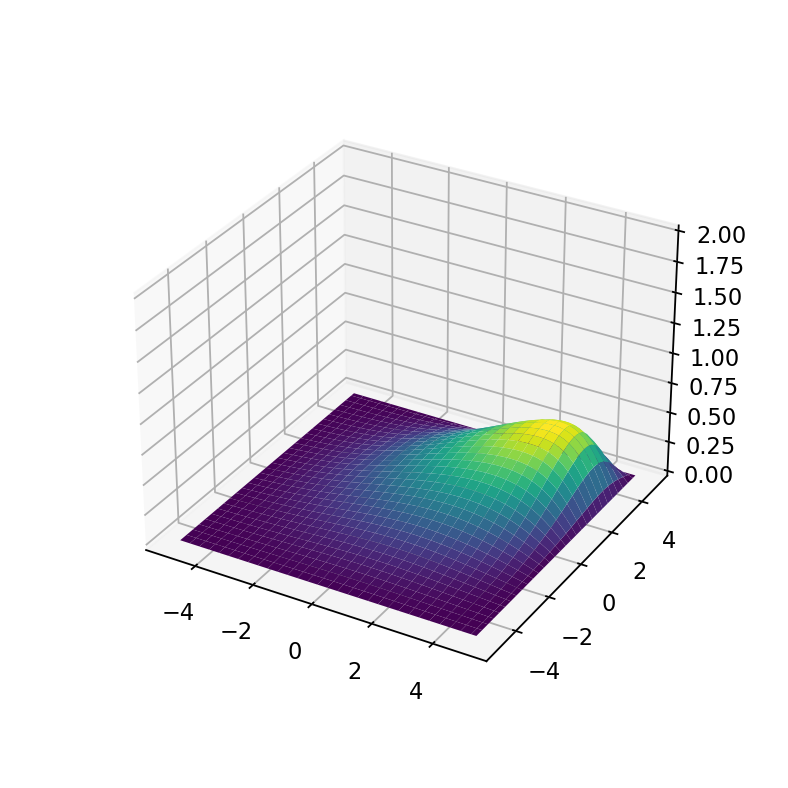

In [71]:
fig = plt.figure(figsize=(3,3))
ax = fig.add_subplot(111, projection='3d')

X,Y = np.meshgrid(x,y)

def init():
    
    ax.set_zlim3d(0,2)

def Update(i):

    ax.clear()
    init()
    
    ax.plot_surface(X,Y,u[i,:,:],cmap='viridis')
    
Animation = animation.FuncAnimation(fig,Update,frames=len(t),init_func=init)


**Gráfica de la superficie**

<IPython.core.display.Javascript object>


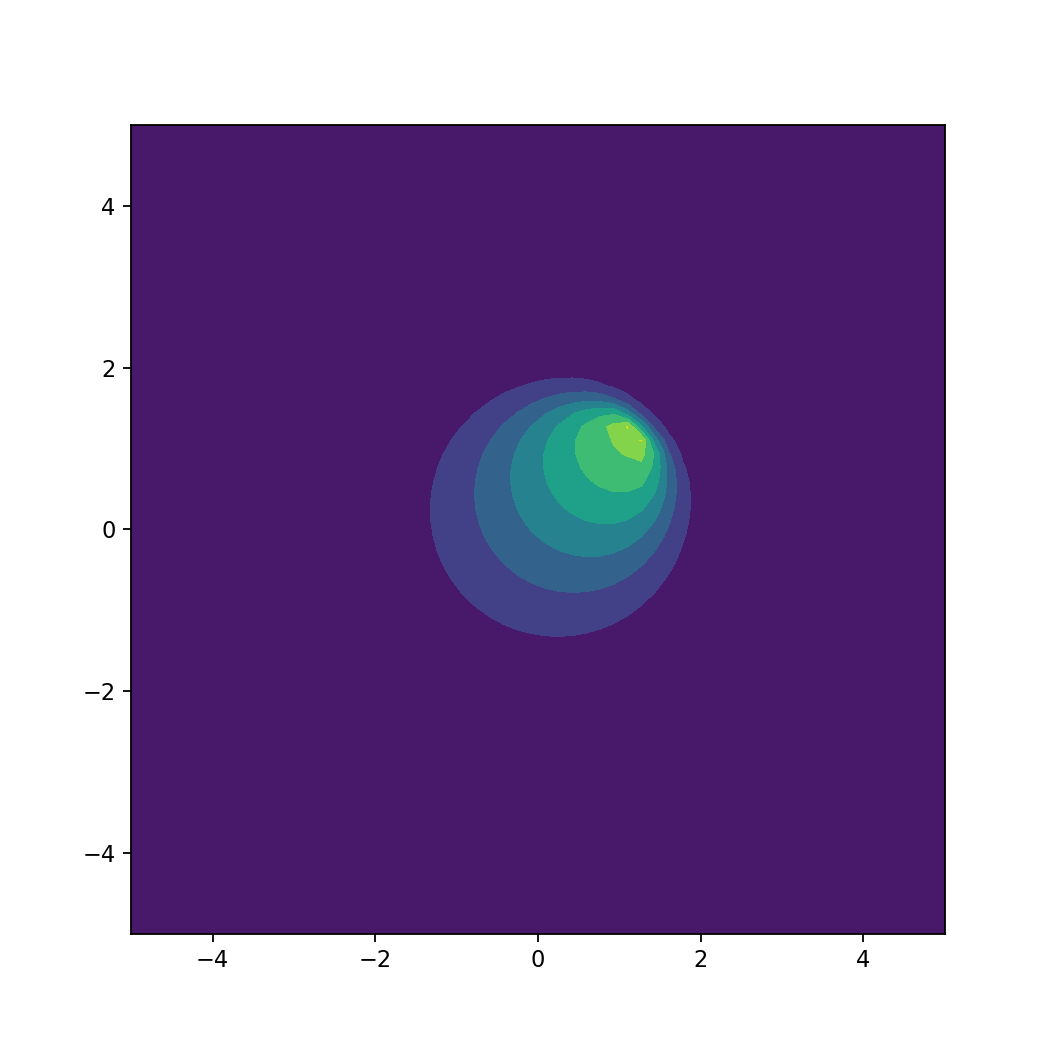

In [73]:

fig1 = plt.figure(figsize=(4,4))
ax1 = fig1.add_subplot(111) 

X,Y = np.meshgrid(x,y)

def Update(i):
    plot = ax1.clear()
    init()
    
    surf = ax1.contourf(X,Y,u[i,:,:].T)
    #cbar = fig.colorbar(surf, ax = ax1)  
   
    return plot

Animation1 = animation.FuncAnimation(fig1, Update, frames=len(t), init_func=init)